# Forecasting Energy Demand with Transformers - Explanatory Data Analysis

### Dataset: https://ieee-dataport.org/open-access/8-years-hourly-heat-and-electricity-demand-residential-building

In [65]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.decomposition import PCA

In [66]:
# Read data:
current_dir = os.getcwd()
os.chdir("..")
os.chdir("..")
df = pd.read_csv(r"data/raw/data.csv")
os.chdir(current_dir)

In [67]:
df.head()

,Time,air_pressure[mmHg],air_temperature[degree celcius],relative_humidity[%],wind_speed[M/S],solar_irridiation[W/m²],total_cloud_cover[from ten],electricity_demand_values[kw],heat_demand_values[kw]
0,2010-12-01 00:00:00,729.7,25.0,85.0,5.0,0,no clouds,289.567557,432.940036
1,2010-12-01 01:00:00,729.4,27.8,77.0,7.0,0,no clouds,260.168520,473.935901
2,2010-12-01 02:00:00,728.9,33.3,62.0,7.0,0,2/10–3/10.,247.273585,483.278761
3,2010-12-01 03:00:00,731.6,32.2,62.0,2.0,0,5/10.,257.955878,545.921252
4,2010-12-01 04:00:00,732.6,22.8,96.0,3.0,0,2/10–3/10.,258.255081,550.526112


In [68]:
# Rename Columns:
col_mapping = {"Time": "ts",
            "air_pressure[mmHg]": "air_pressure",
            "air_temperature[degree celcius]": "air_temperature",
            "relative_humidity[%]": "relative_humidity",
            "wind_speed[M/S]": "wind_speed",
            "solar_irridiation[W/m²]": "solar_irridiation",
            "total_cloud_cover[from ten]": "total_cloud_cover",
            "electricity_demand_values[kw]": "electricity_demand_values",
            "heat_demand_values[kw]": "heat_demand_values"}
df = df.rename(columns = col_mapping)

In [69]:
# Change ts to datetime and set as index:
df["ts"] = pd.to_datetime(df["ts"])
df = df.set_index("ts")

In [70]:
df["total_cloud_cover"].unique()

array(['no clouds', '2/10–3/10.', '5/10.', '10/10.',
       'Sky obscured by fog and/or other meteorological phenomena.',
       '7/10 – 8/10.', nan, '4/10.'], dtype=object)

In [71]:
# Clean category names for total_cloud_cover:
cloud_mapping = {"no clouds": "0",
                 "2/10–3/10.": "2.5",
                 "5/10.": "5",
                 "10/10.": "10",
                 "Sky obscured by fog and/or other meteorological phenomena.": "Obscured",
                 "7/10 – 8/10.": "7.5",
                 "nan": np.NaN,
                 "4/10.": "4"}

df = df.replace({"total_cloud_cover": cloud_mapping})

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70080 entries, 2010-12-01 00:00:00 to 2018-11-28 23:00:00
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   air_pressure               69934 non-null  float64
 1   air_temperature            69903 non-null  float64
 2   relative_humidity          69903 non-null  float64
 3   wind_speed                 69125 non-null  float64
 4   solar_irridiation          70080 non-null  int64  
 5   total_cloud_cover          69837 non-null  object 
 6   electricity_demand_values  70073 non-null  float64
 7   heat_demand_values         70073 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 4.8+ MB


In [73]:
df.describe()

,air_pressure,air_temperature,relative_humidity,wind_speed,solar_irridiation,electricity_demand_values,heat_demand_values
count,69934.000000,69903.000000,69903.000000,69125.000000,70080.000000,70073.000000,70073.000000
mean,734.588143,17.871834,60.644178,4.828268,257.293094,393.888975,263.506355
std,5.011322,10.683280,22.007274,2.598960,258.725788,239.189061,314.704564
min,716.500000,-14.400000,4.000000,0.000000,0.000000,112.947618,0.000000
25%,731.400000,10.000000,43.000000,3.000000,0.000000,227.707914,0.000000
50%,734.200000,18.900000,61.000000,5.000000,299.500000,323.093703,137.281603
75%,737.500000,25.600000,79.000000,6.000000,499.000000,476.911512,448.289876
max,757.500000,43.300000,100.000000,26.000000,699.000000,1592.893206,1529.168786


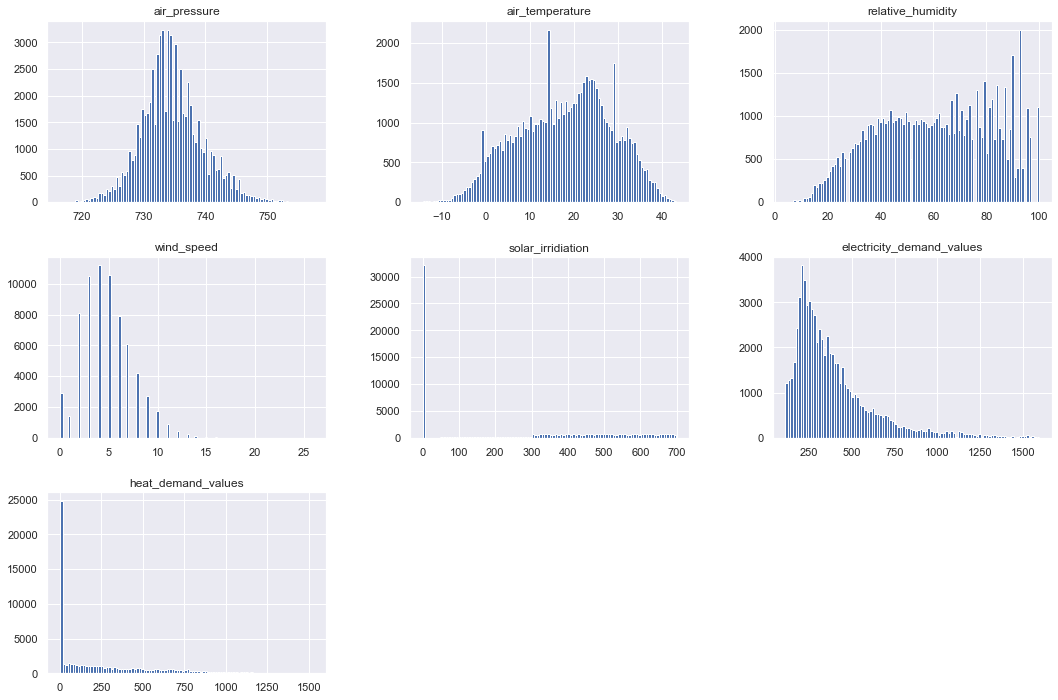

In [74]:
# Historical Plot of Continuous Variables:
df.hist(bins = 100, figsize = (18, 12));

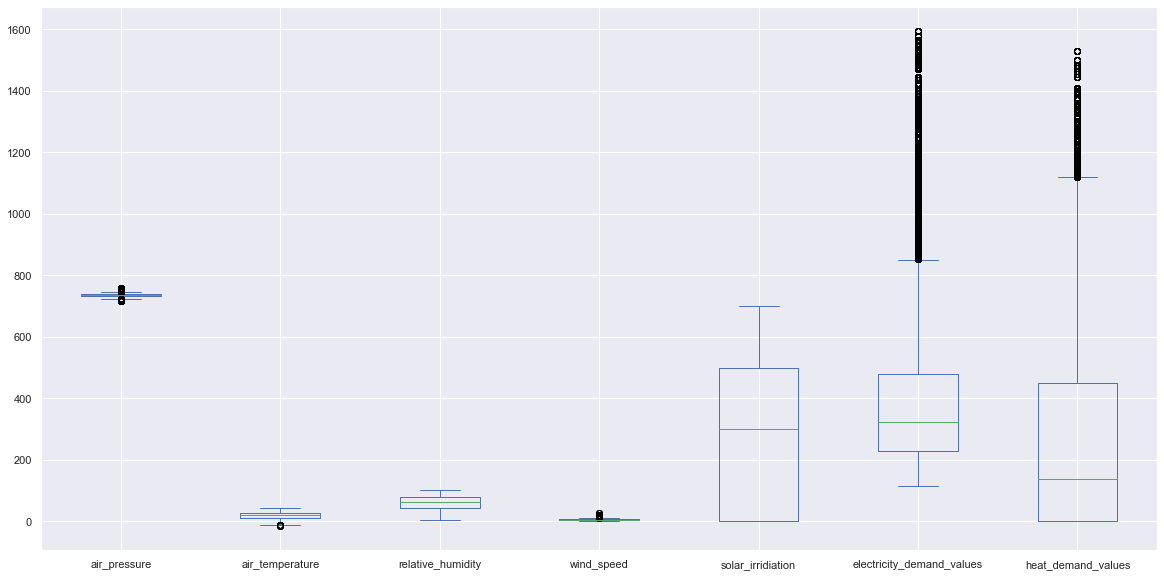

In [75]:
# Box Plots:
df.plot.box(figsize = (20, 10));

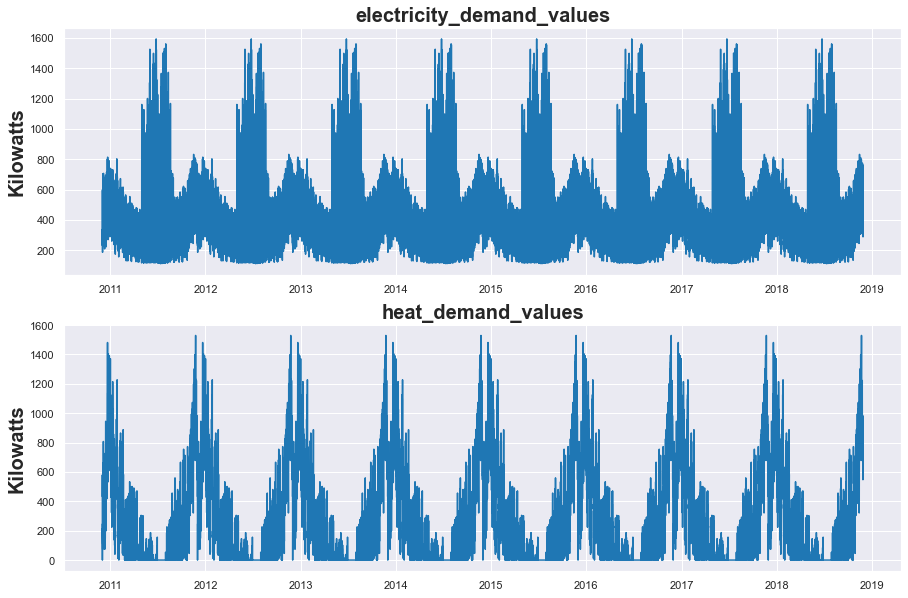

In [76]:
# Power Plots:
plt_cols = ['electricity_demand_values',
 'heat_demand_values']

fig, ax = plt.subplots(len(plt_cols), figsize = (15, 10))

for i in range(len(plt_cols)):
    ax[i].plot(df.index, df[plt_cols[i]], color = "tab:blue")
    ax[i].set_title(plt_cols[i], fontsize=20, fontweight='bold')
    ax[i].set_ylabel('Kilowatts', fontsize=20, fontweight='bold');



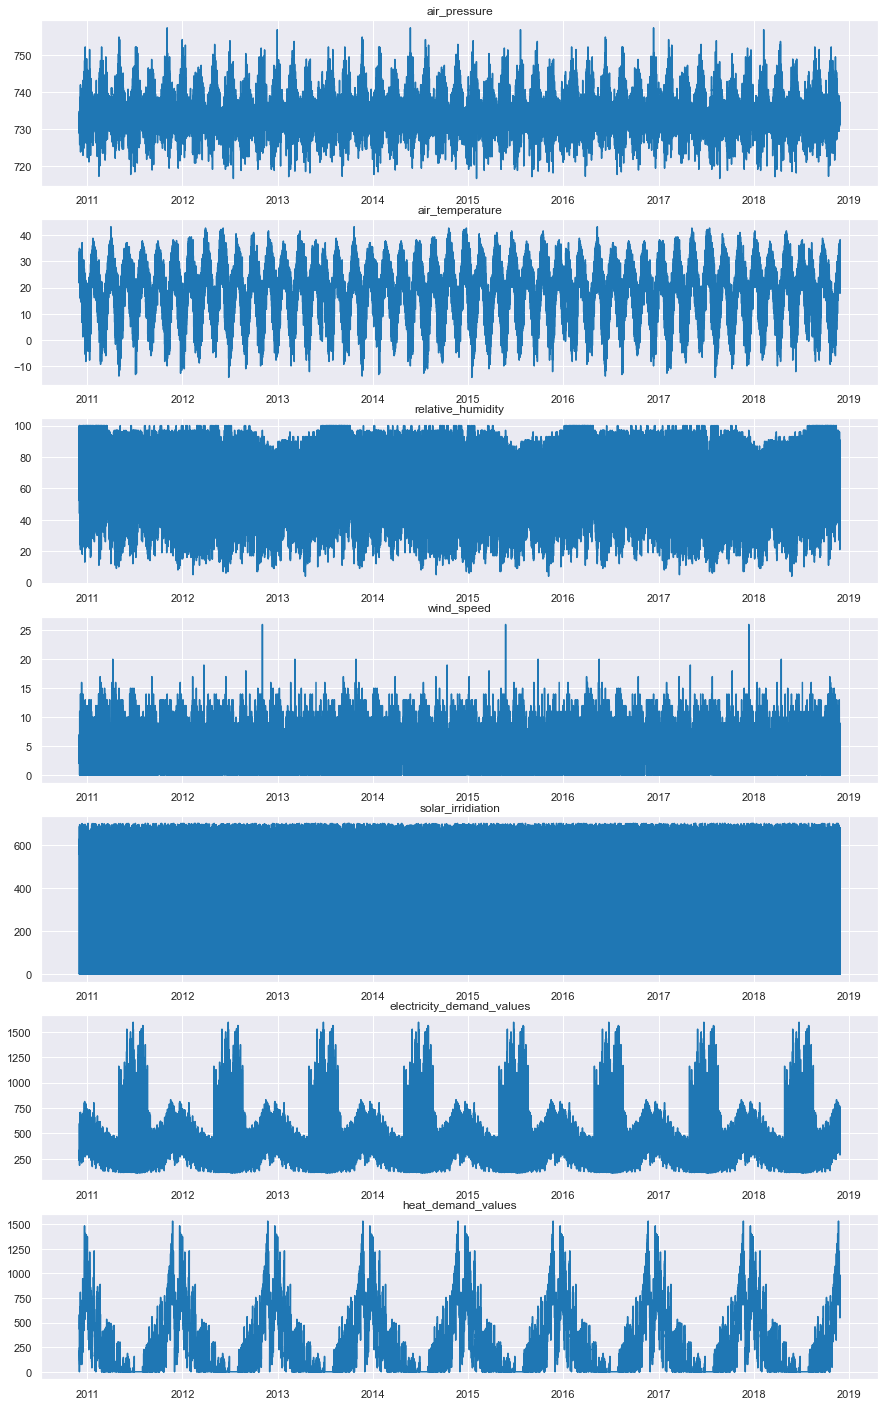

In [77]:
# Timeseries Plot of Continuous Variables Per Year:
plt_cols = df.columns.to_list()
plt_cols.remove("total_cloud_cover")

fig, ax = plt.subplots(len(plt_cols), figsize = (15, 25))

for i in range(len(plt_cols)):
    ax[i].plot(df.index, df[plt_cols[i]], color = "tab:blue")
    ax[i].set_title(plt_cols[i])

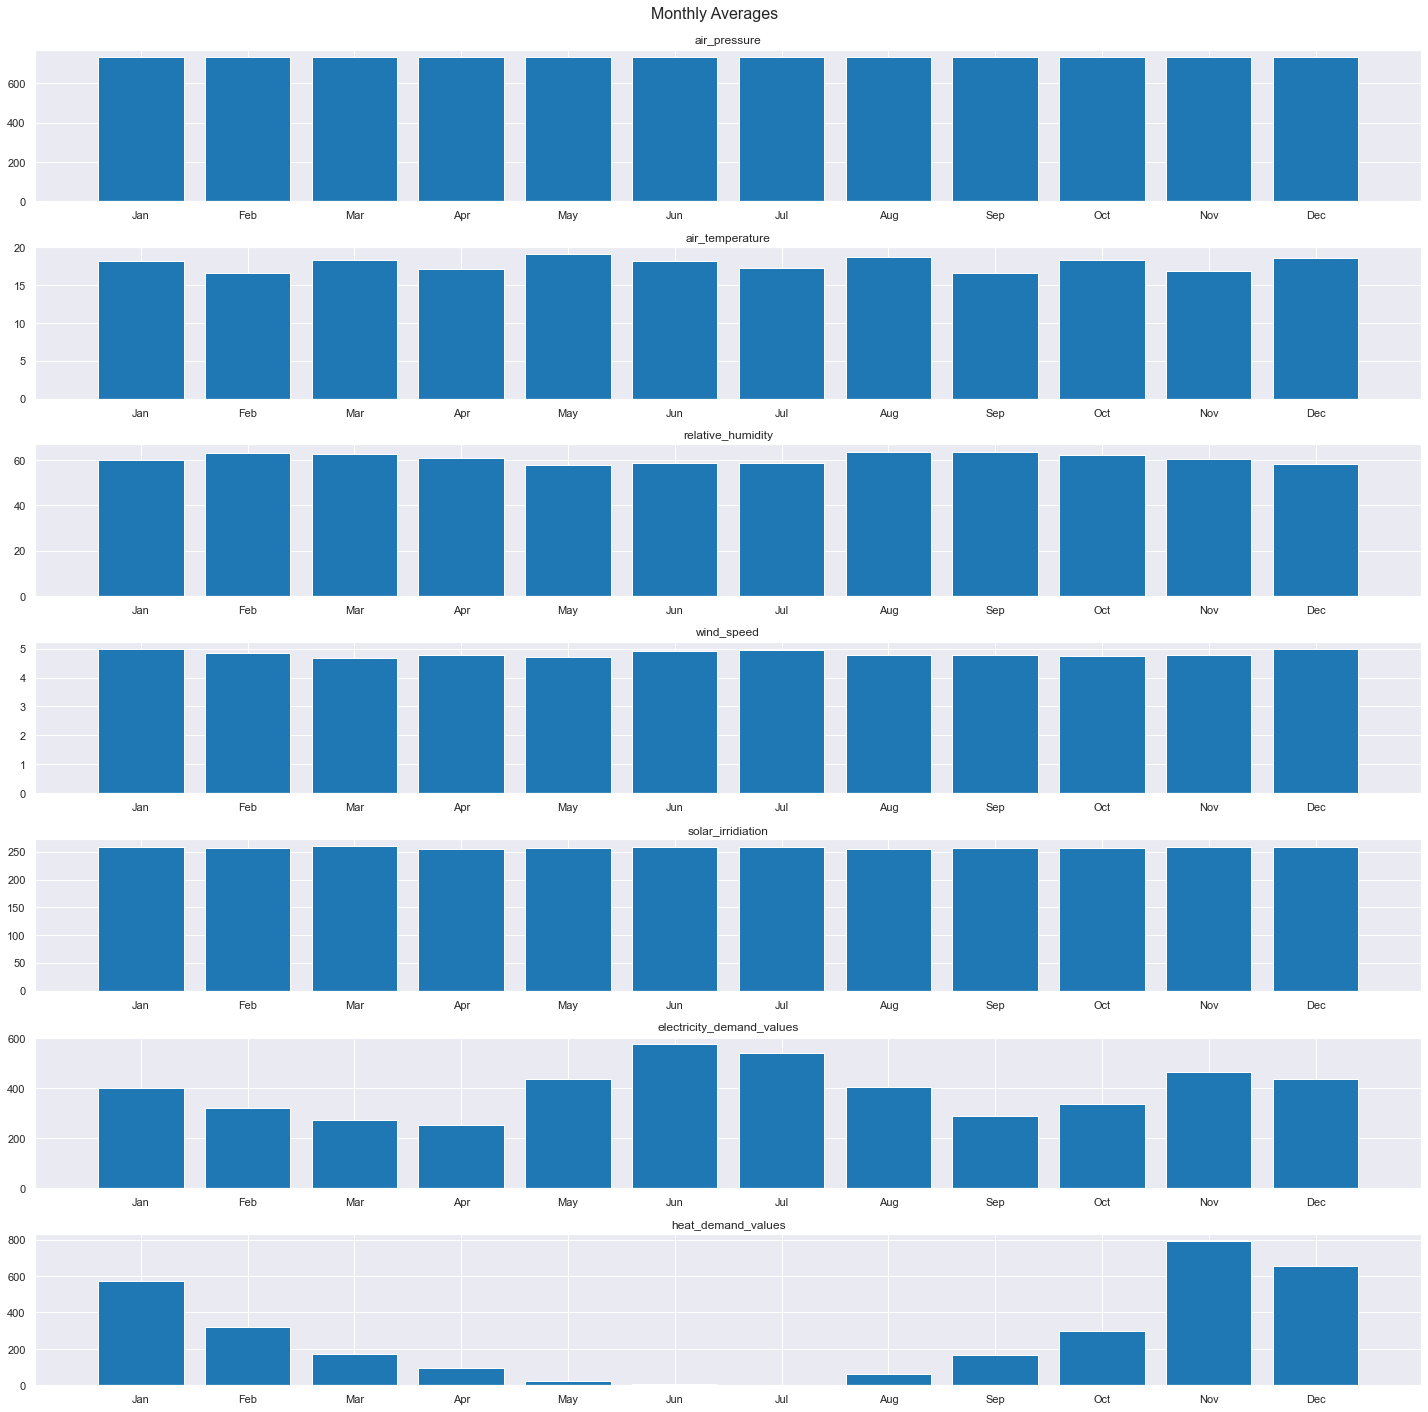

In [78]:
# Monthly Plots:
monthly = df.dropna().resample("M").mean().copy()
monthly["month"] = monthly.index.month
monthly = monthly.groupby(monthly["month"]).mean()

fig, ax = plt.subplots(len(monthly.columns), figsize = (20, 20))

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

for i in range(len(monthly.columns)):
    ax[i].bar(months, monthly[monthly.columns[i]], color = "tab:blue")
    ax[i].set_title(monthly.columns[i])

fig.suptitle("Monthly Averages", fontsize = 16)
fig.tight_layout()
fig.subplots_adjust(top = 0.95)

Text(0.5, 0.98, 'Weekday Averages')

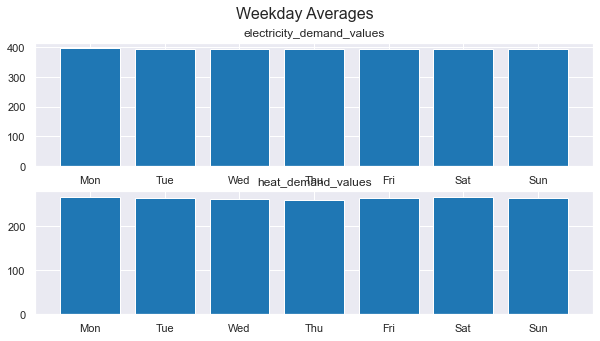

In [80]:
# Weekly Plots:
dayofweek = df[["electricity_demand_values", "heat_demand_values"]].dropna().copy()
dayofweek["dayofweek"] = dayofweek.index.dayofweek
dayofweek = dayofweek.groupby(dayofweek["dayofweek"]).mean()

fig, ax = plt.subplots(len(dayofweek.columns), figsize = (10, 5))

days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

for i in range(len(dayofweek.columns)):
    ax[i].bar(days, dayofweek[dayofweek.columns[i]], color = "tab:blue")
    ax[i].set_title(dayofweek.columns[i])

fig.suptitle("Weekday Averages", fontsize = 16)

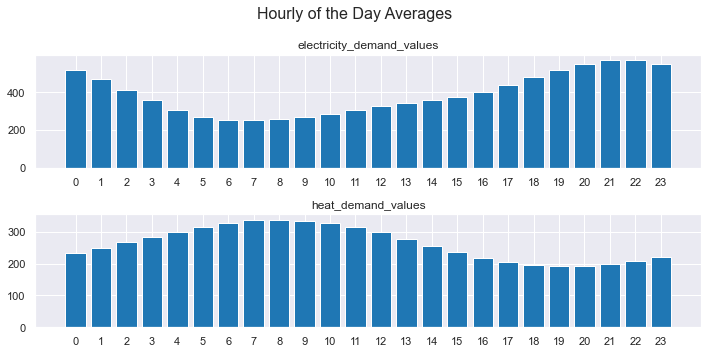

In [81]:
# Hour Plots:
hourly = df[["electricity_demand_values", "heat_demand_values"]].dropna().copy()
hourly["hourly"] = hourly.index.hour
hourly = hourly.groupby(hourly["hourly"]).mean()

fig, ax = plt.subplots(len(hourly.columns), figsize = (10, 5))

hours = [str(i) for i in range(0, 24)]

for i in range(len(hourly.columns)):
    ax[i].bar(hours, hourly[hourly.columns[i]], color = "tab:blue")
    ax[i].set_title(hourly.columns[i])

fig.suptitle("Hourly of the Day Averages", fontsize = 16)
fig.tight_layout()

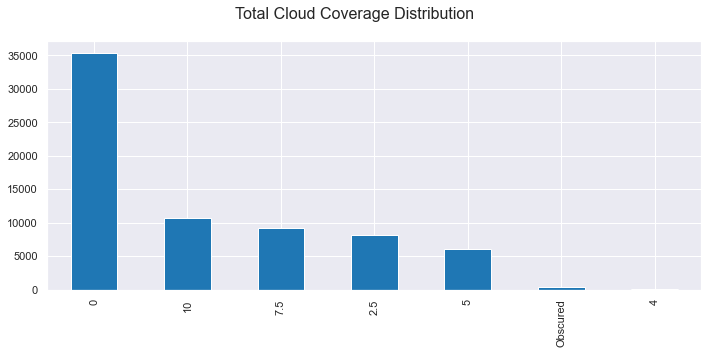

In [82]:
# Categorical Variable Plots:
fig, ax = plt.subplots(figsize = (10, 5))
df.total_cloud_cover.value_counts().plot.bar(color = "tab:blue");
fig.suptitle("Total Cloud Coverage Distribution", fontsize = 16)
fig.tight_layout()

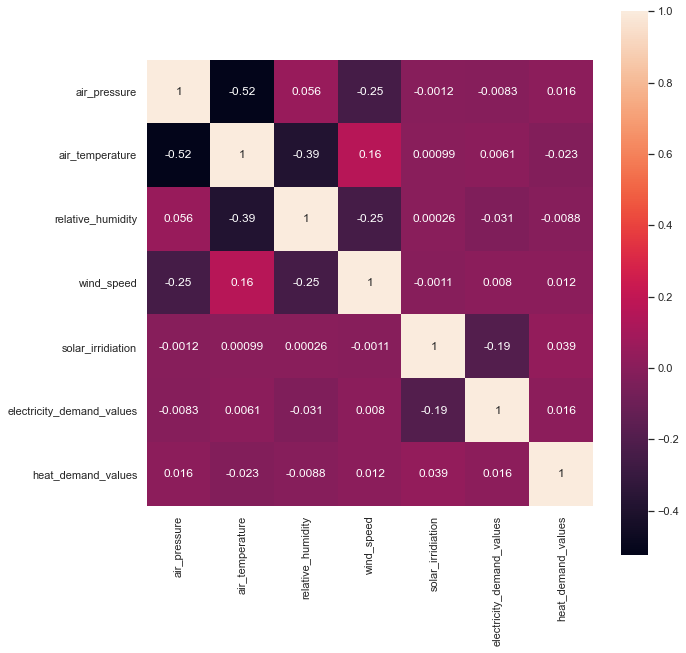

In [83]:
# Correlation Matrix:
fig, ax = plt.subplots(figsize = (10, 10))
sn.heatmap(df.corr(), annot = True, square = True);

In [84]:
# One Hot Encoding total_cloud_cover:
dfs = [df, pd.get_dummies(df.total_cloud_cover, prefix='cloud_cover')]

df_c = pd.concat(dfs, axis = 1)
# Drop old columns:
df_c = df_c.drop(columns = ["total_cloud_cover"])

# Drop NaN:
df_c = df_c.dropna()

Text(0, 0.5, 'Explained Variance Ratio')

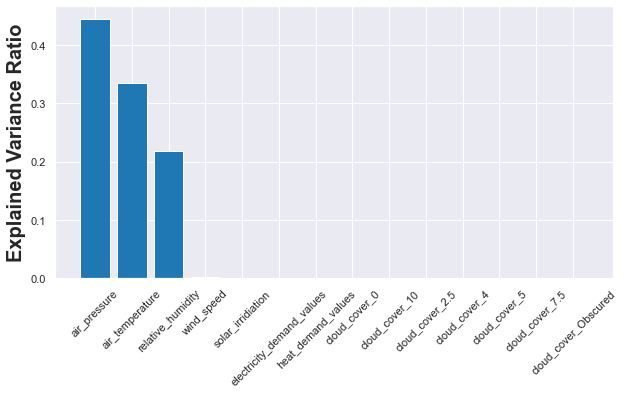

In [85]:
# PCA:
pca = PCA()
pca.fit(df_c.to_numpy())
variance = pca.explained_variance_ratio_
fig, ax = plt.subplots(figsize = (10, 5))
plt.bar(df_c.columns, variance, alpha = 1, color = "tab:blue")
plt.xticks(rotation = 45)

ax.set_ylabel('Explained Variance Ratio', fontsize=20, fontweight='bold')
